In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Red txt data file 
with open("WhatsApp Chat with HEALTH VOLUNTEERS NAIJA.txt ", "r", encoding = "utf-8") as file:
    chats = file.readlines()
print(len(chats))

5392


In [5]:
#Remove new lines
chats = [line.strip() for line in chats]
chats[:10]
print(len(chats))

#Getting join notification lines
rifesh = [line for line in chats if  "added" in line]

#Further cleaning
#Remove empty lines
rifesh = [line for line in rifesh if len(line) > 1]
print(len(rifesh))

5392
41


In [8]:
added = [line for line in rifesh if  "added" in line]
added

['12/16/19, 7:29 PM - +234 802 694 7473 added you',
 '12/18/19, 9:39 AM - +234 815 920 8044 added +234 903 191 7748',
 '12/21/19, 10:48 PM - +234 802 694 7473 added +234 806 650 4322',
 '12/23/19, 4:36 AM - +234 802 694 7473 added +234 806 005 6071, +234 813 712 1869, and +234 816 457 4530',
 '12/25/19, 7:47 AM - +234 803 531 8410: Rotimi am sure u v added weight now',
 'Who added me to this group? Kini HVN??',
 'Who added me to this group? Kini HVN??',
 '12/29/19, 6:09 AM - +234 802 694 7473 added +234 701 040 2110',
 '12/29/19, 6:12 AM - +234 802 694 7473 added +234 810 421 7439',
 '1/7/20, 1:27 PM - +234 802 694 7473 added +234 703 635 6587',
 '1/8/20, 3:59 PM - +234 802 694 7473 added +234 902 319 7888',
 '1/8/20, 3:59 PM - +234 802 694 7473 added +234 813 090 1321',
 '1/8/20, 5:31 PM - +234 802 694 7473 added +234 705 073 1755',
 '1/8/20, 7:25 PM - +234 802 694 7473 added +234 816 582 1129',
 '1/8/20, 7:47 PM - +234 802 694 7473 added +234 703 513 8523',
 '1/9/20, 6:52 AM - +234 8

In [9]:
len(added)

41

In [10]:
#Remove new lines
chats = [line.strip() for line in chats]
chats[:10]
print(len(chats))

#Clean out the join notification lines
rifesh = [line for line in chats if not "added" in line]

#Further cleaning
#Remove empty lines
rifesh = [line for line in rifesh if len(line) > 1]
print(len(rifesh))

5392
4531


In [11]:
#Remove even more auto lines
rifesh = [line for line in rifesh if not "You revoked" in line]
print(len(rifesh))

4531


In [12]:
#Drop 'left-ers'
left = [line for line in rifesh if line.endswith("left")]
left

['12/30/19, 10:43 PM - +234 802 968 3044 left',
 '1/16/20, 2:38 AM - +234 803 917 6755: So sorry,May God protect what she left',
 '1/23/20, 4:52 PM - +234 816 582 1129 left',
 '2/3/20, 9:48 AM - +234 909 080 8617 left']

In [13]:
len(left)

4

In [14]:
#Remove all that 'left'
rifesh = [line for line in rifesh if not line.endswith("left")]
print(len(rifesh))

4527


In [15]:
#Merge messages that belong together
msgs = [] #message container
pos = 0 #counter for position of msgs in the container
"""
Flow:
For every line, see if it matches the expression which is starting with the format "number(s)+slash" eg "12/"
If it does, it is a new line of conversion as they begin with dates, add it to msgs container
Else, it is a continuation of the previous line, add it to the previous line and append to msgs, then pop previous line.
"""
for line in rifesh:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos-1] + ". " + line
        msgs.append(take)
        msgs.pop(pos-1)

len(msgs)

2814

In [16]:
msgs[1:9]

['2/12/18, 2:26 AM - +234 802 694 7473 created group "HEALTH VOLUNTEERS NAIJA"',
 '12/16/19, 7:29 PM - +234 802 694 7473: Welcome Tolulope  to the family. @2348054441077  pls do introduce yourself',
 '12/16/19, 7:32 PM - Tolulope: I am Tolulope Boboye. I am a Data Analyst. I joined this group to lend my own support to the community on health related programs..',
 '12/16/19, 7:33 PM - +234 803 498 2891: Hello Tolulope, welcome to our midst. ♥♥♥',
 '12/16/19, 7:33 PM - Tolulope: The pleasure is mine',
 '12/16/19, 7:34 PM - +234 808 900 7904: U welcome dear',
 '12/16/19, 7:35 PM - Tolulope: 🙂',
 '12/16/19, 7:42 PM - +234 802 694 7473: Welcome to the family bro']

In [17]:
#Drop first two lines: auto msg
msgs = msgs[2:]
len(msgs)

2812

In [18]:
#peep message format so far
msgs[50:55]

['12/17/19, 8:03 AM - +234 802 694 7473: Gudu morning ma',
 '12/17/19, 8:05 AM - +234 909 873 4227: 😁😌',
 '12/17/19, 8:06 AM - +234 909 873 4227: <Media omitted>',
 "12/17/19, 8:07 AM - +234 909 873 4227: *subtle reminder*. Let's share this with our network please. This might be what someone needs",
 "12/17/19, 8:09 AM - +234 808 116 1152: Acknowledged ma'am."]

In [19]:
#make arrays of different parts of the messages
Date = []
Time = []
Number_Author = []
msg = []
counter = 0
for line in msgs:
    x = line.split()
    #Get the date
    dating = x[0]
    Date.append(dating.replace(',',''))
    
    #Get the time
    timing = x[1] + " " +x[2]
    Time.append(timing)
    
    #Get number
    num = " ".join(x[3:9]) #the parts numbers/names fall in
    try:
        match = re.search(r"- ([^']*):", num).group(1) #match between '- ' and ':' where they are per se
        Number_Author.append(match)
    except:
        Number_Author.append("-")
        pass
    #Get message
    #num = " ".join(x[3:8]) #num/name position
    #match = re.search(r"- ([^']*):", num).group(1) #isolate the num/name per se
    part = line.partition(match)[2] #partition according to the match and extract the last part, the msg
    msging = part[2:] #strip off the first two characters as they are ": "
    msg.append(msging)
    
#     counter += 1
#     print(counter)

print(len(Date), len(Time), len(Number_Author), len(msg))

2812 2812 2812 2812


In [20]:
#Put in a dataframe
rifesh_df = pd.DataFrame()
rifesh_df["Date"] = Date
rifesh_df["Time"] = Time
rifesh_df["Number_Author"] = Number_Author
rifesh_df["msg"] = msg

rifesh_df.head()

,Date,Time,Number_Author,msg
0,12/16/19,7:29 PM,+234 802 694 7473,Welcome Tolulope to the family. @234805444107...
1,12/16/19,7:32 PM,Tolulope,I am Tolulope Boboye. I am a Data Analyst. I j...
2,12/16/19,7:33 PM,+234 803 498 2891,"Hello Tolulope, welcome to our midst. ♥♥♥"
3,12/16/19,7:33 PM,Tolulope,The pleasure is mine
4,12/16/19,7:34 PM,+234 808 900 7904,U welcome dear


Text(0.5, 1.0, 'Top 10 Time of Engagement')

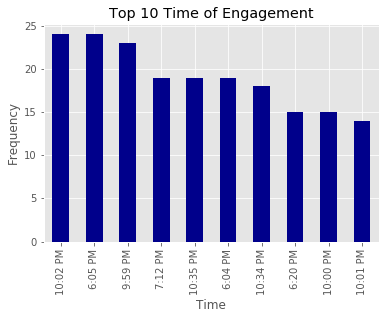

In [21]:
toptimeengaged = rifesh_df.Time.value_counts(ascending=False).head(10)
ax = toptimeengaged.plot(kind="bar", color='Darkblue')
ax.set_xlabel ('Time')
ax.set_ylabel ('Frequency')
ax.set_title("Top 10 Time of Engagement")

+234 802 694 7473    340
+234 808 097 6617    319
+234 813 122 9553    166
+234 811 769 0450    155
+234 807 753 8091    150
+234 909 873 4227    127
+234 811 464 6613    103
+234 802 226 8087     90
+234 809 823 6782     81
+234 706 554 8316     79
Name: Number_Author, dtype: int64


Text(0.5, 1.0, 'Top 10 Users that sent more messages')

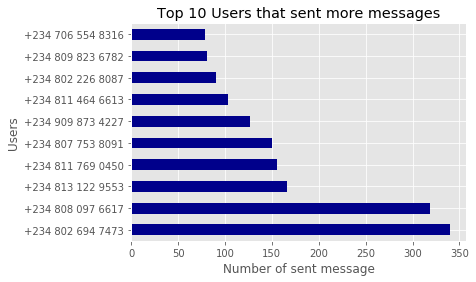

In [22]:
top10messengers = rifesh_df.Number_Author.value_counts(ascending=False).head(10)
print(top10messengers)
ax = top10messengers.plot.barh(color='Darkblue')
ax.set_xlabel ('Number of sent message')
ax.set_ylabel("Users")
ax.set_title("Top 10 Users that sent more messages")

In [23]:
rifesh_df['Letter_Count'] = rifesh_df['msg'].apply(lambda s : len(s))
rifesh_df['Word_Count'] = rifesh_df['msg'].apply(lambda s : len(s.split(' ')))

In [24]:
rifesh_df.head()

,Date,Time,Number_Author,msg,Letter_Count,Word_Count
0,12/16/19,7:29 PM,+234 802 694 7473,Welcome Tolulope to the family. @234805444107...,74,12
1,12/16/19,7:32 PM,Tolulope,I am Tolulope Boboye. I am a Data Analyst. I j...,131,25
2,12/16/19,7:33 PM,+234 803 498 2891,"Hello Tolulope, welcome to our midst. ♥♥♥",41,7
3,12/16/19,7:33 PM,Tolulope,The pleasure is mine,20,4
4,12/16/19,7:34 PM,+234 808 900 7904,U welcome dear,14,3


In [25]:
rifesh_df.describe(include='object')

,Date,Time,Number_Author,msg
count,2812,2812,2812,2812
unique,58,872,125,2071
top,1/1/20,10:02 PM,+234 802 694 7473,<Media omitted>
freq,308,24,340,362


In [26]:
rifesh_df.describe()

,Letter_Count,Word_Count
count,2812.000000,2812.000000
mean,62.011735,10.091394
std,296.470272,38.145313
min,0.000000,1.000000
25%,11.000000,2.000000
50%,17.000000,3.000000
75%,43.000000,8.000000
max,11898.000000,1223.000000


In [27]:
rifesh_df['Letter_Count'].sum(), rifesh_df['Word_Count'].sum()

(174377, 28377)

Text(0.5, 1.0, 'Top 10 date of engagement')

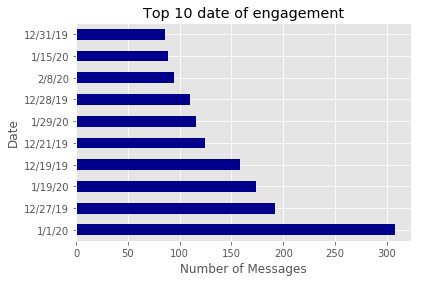

In [28]:
top10date = rifesh_df['Date'].value_counts().head(10)# Top 10 Dates on which the most number of messages were sent
ax = top10date.plot.barh(color= 'Darkblue')
ax.set_xlabel('Number of Messages')
ax.set_ylabel('Date')
ax.set_title('Top 10 date of engagement')

In [29]:
rifesh_df['Hour'] = rifesh_df['Time'].apply(lambda x : x.split(':')[0]) # The first token of a value in the Time Column contains the hour (Eg., "20" in "20:15")

Text(0.5, 1.0, 'Top Hours of engagement by Users')

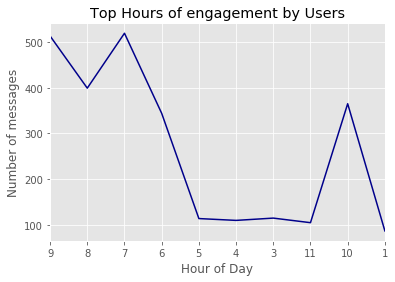

In [30]:
top10hourtochat = rifesh_df['Hour'].value_counts().head(10).sort_index(ascending=False) # Top 10 Hours of the day during which the most number of messages were sent
ax = top10hourtochat.plot.line(color='Darkblue')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of messages')
ax.set_title('Top Hours of engagement by Users')

In [31]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(rifesh_df.msg.str)

the                  731
to                   715
and                  511
of                   451
you                  374
<Media               362
omitted>             362
in                   358
a                    311
for                  294
is                   268
I                    251
are                  189
we                   185
be                   184
this                 180
with                 166
your                 163
our                  159
on                   158
will                 157
that                 143
Good                 128
have                 123
all                  119
Thank                102
Happy                 98
my                    98
Welcome               95
us                    92
                    ... 
Country                1
mercy🙏                 1
bit.ly/cksreg-20.      1
62.                    1
perseverance           1
1st                    1
FINNIDA:               1
cup                    1
Mrs                    1


In [32]:
def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)
    
    #Remove unneccessary word
    text = re.sub(r'omitted>', '', text)
    text = re.sub(r'<media', '<', text)
    text = re.sub(r'will', '', text)
    text = re.sub(r'thanks', '', text)
    
    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text